### 데이터 변환

In [9]:
import os

DATA_PATH = os.path.join(os.getcwd(), 'gesture_data')
gestures = ['fire', 'shot', 'nono', 'hit', 'hi', 'nyan']

for label in gestures:
    file_path = os.path.join(DATA_PATH, f"{label}.npy")
    if os.path.exists(file_path):
        print(f"✅ 존재함: {file_path}")
    else:
        print(f"❌ 없음: {file_path}")


✅ 존재함: c:\Users\SSAFY\Desktop\daramstudy\ImageAnalysis\손 동적 모델 data 수집\gesture_data\fire.npy
✅ 존재함: c:\Users\SSAFY\Desktop\daramstudy\ImageAnalysis\손 동적 모델 data 수집\gesture_data\shot.npy
✅ 존재함: c:\Users\SSAFY\Desktop\daramstudy\ImageAnalysis\손 동적 모델 data 수집\gesture_data\nono.npy
✅ 존재함: c:\Users\SSAFY\Desktop\daramstudy\ImageAnalysis\손 동적 모델 data 수집\gesture_data\hit.npy
✅ 존재함: c:\Users\SSAFY\Desktop\daramstudy\ImageAnalysis\손 동적 모델 data 수집\gesture_data\hi.npy
✅ 존재함: c:\Users\SSAFY\Desktop\daramstudy\ImageAnalysis\손 동적 모델 data 수집\gesture_data\nyan.npy


In [10]:
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

DATA_PATH = 'gesture_data'
gestures = ['fire', 'shot', 'nono', 'hit', 'hi', 'nyan']

X = []
y = []

# 각 제스처 파일 로드
for label in gestures:
    file_path = os.path.join(DATA_PATH, f"{label}.npy")
    sequences = np.load(file_path)  # shape: (n_sequences, 30, 63)
    
    X.extend(sequences)
    y.extend([label] * len(sequences))  # 각 sequence에 해당 라벨 추가

X = np.array(X)
y = np.array(y)

# 라벨 인코딩 (문자 → 숫자 → 원-핫 벡터)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

print("✅ X shape:", X.shape)  # (전체 sequence 개수, 30, 63)
print("✅ y shape:", y_categorical.shape)  # (전체 sequence 개수, 클래스 수)


✅ X shape: (165, 30, 63)
✅ y shape: (165, 6)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

# 데이터셋 나누기
X_train, X_test, y_train, y_test = train_test_split(
    X, y_categorical, test_size=0.2, random_state=42, shuffle=True
)

# 모델 정의
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 63)))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(gestures), activation='softmax'))  # 클래스 수 = 6

# 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 학습
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test)
)

# 저장
model.save('gesture_rnn_model.h5')
print("✅ 모델 저장 완료: gesture_rnn_model1.h5")


Epoch 1/100


c:\Users\SSAFY\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - accuracy: 0.1635 - loss: 1.7979 - val_accuracy: 0.2424 - val_loss: 1.7764
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.2556 - loss: 1.7664 - val_accuracy: 0.1818 - val_loss: 1.7535
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.1802 - loss: 1.7590 - val_accuracy: 0.2121 - val_loss: 1.7522
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.3397 - loss: 1.6923 - val_accuracy: 0.2121 - val_loss: 1.7000
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.2588 - loss: 1.6730 - val_accuracy: 0.2727 - val_loss: 1.6137
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3740 - loss: 1.5292 - val_accuracy: 0.3636 - val_loss: 1.4857
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.3408 - loss: 1.4387 - val_accuracy: 0.2424 - val_loss: 1.4671
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4088 - loss: 1.3108 - val_accuracy: 0.3333 - val_loss: 1.3638
Epo

✅ 모델 저장 완료: gesture_rnn_model1.h5


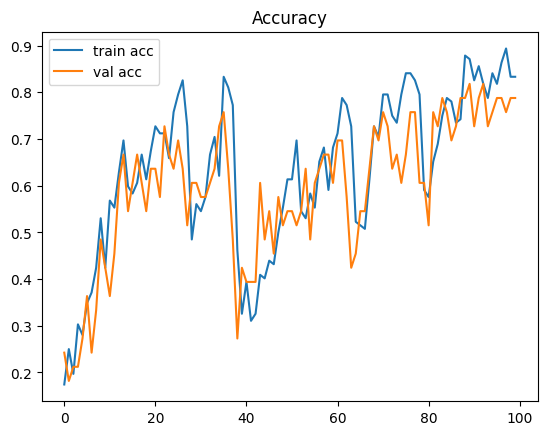

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')
plt.show()
